In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import sklearn stuff

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [3]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [8]:
df.loc[df['species'] == 'setosa'].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [10]:
df.loc[df['species'] == 'versicolor'].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor


In [11]:
df.loc[df['species'] == 'virginica'].head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
100,6.3,3.3,6.0,2.5,virginica
101,5.8,2.7,5.1,1.9,virginica
102,7.1,3.0,5.9,2.1,virginica
103,6.3,2.9,5.6,1.8,virginica
104,6.5,3.0,5.8,2.2,virginica


In [22]:
virginica_flowers = df.loc[df['species'] == 'virginica']
setosa_flowers = df.loc[df['species'] == 'setosa']
versicolor_flowers = df.loc[df['species'] == 'versicolor']

In [24]:
len(versicolor_flowers)

50

<AxesSubplot:xlabel='sepal_length'>

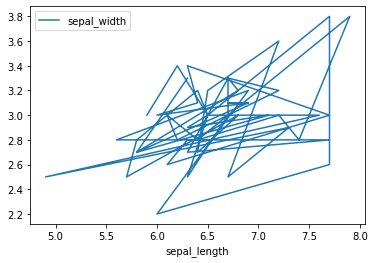

In [18]:
virginica_flowers.plot(x = 'sepal_length', y = 'sepal_width', kind='line')

<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

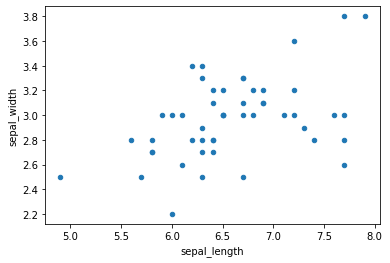

In [19]:
virginica_flowers.plot(x = 'sepal_length', y = 'sepal_width', kind='scatter')

In [36]:
vg_sl = virginica_flowers['sepal_length']
vg_sw = virginica_flowers['sepal_width']

s_sl = setosa_flowers['sepal_length']
s_sw = setosa_flowers['sepal_width']

ver_sl = versicolor_flowers['sepal_length']
ver_sw = versicolor_flowers['sepal_width']

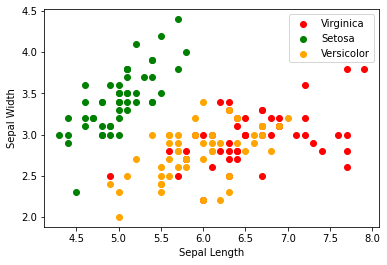

In [40]:
plt.scatter([vg_sl],[vg_sw], color = 'red', label = 'Virginica')
plt.scatter([s_sl],[s_sw], color = 'green', label = 'Setosa')
plt.scatter([ver_sl],[ver_sw], color = 'orange', label = 'Versicolor')

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(loc = 'upper right')

In [41]:
vg_pl = virginica_flowers['petal_length']
vg_pw = virginica_flowers['petal_width']

s_pl = setosa_flowers['petal_length']
s_pw = setosa_flowers['petal_width']

ver_pl = versicolor_flowers['petal_length']
ver_pw = versicolor_flowers['petal_width']

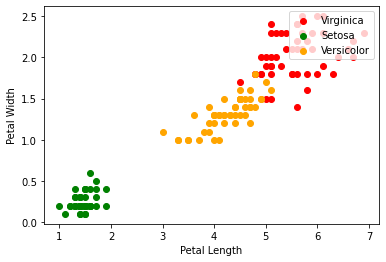

In [42]:
plt.scatter([vg_pl],[vg_pw], color = 'red', label = 'Virginica')
plt.scatter([s_pl],[s_pw], color = 'green', label = 'Setosa')
plt.scatter([ver_pl],[ver_pw], color = 'orange', label = 'Versicolor')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc = 'upper right')

## Preprocess

Kinds of y:

    Numerical/Continous (543.324,12312.4,312..)
    
    Categorical (1,2,3)

In [50]:
from sklearn.preprocessing import LabelBinarizer

In [44]:
y = df['species']

In [45]:
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

Species - Catgorical and Nominal

Use one hot encoding

In [47]:
pd.get_dummies(y)

,setosa,versicolor,virginica
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
145,0,0,1
146,0,0,1
147,0,0,1
148,0,0,1


In [52]:
y = LabelBinarizer().fit_transform(y)

In [55]:
y.shape

(150, 3)

In [65]:
y[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

## Define X - the data for training 

In [56]:
X = df.loc[:, df.columns!='species']

In [57]:
X.shape

(150, 4)

In [58]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [62]:
X = X.to_numpy()

In [63]:
type(X)

numpy.ndarray

In [64]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])